# OilyGiant - New Well Location

## Introduction

The purpose of this project is to find the best place for a new well for the OilyGiant company. We have data for three different regions, and based on that we will build a model for predicting the volume of reserves in the new wells. The region with the highest estimated values and highest total profit and lowest risk of loss will be selected.

## Prepare Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Download dataset

# Region 0
data_0 = pd.read_csv('/datasets/geo_data_0.csv')

# Region 1
data_1 = pd.read_csv('/datasets/geo_data_1.csv')

# Region 2
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# Check data types 

print(data_0.info())
print(data_1.info())
print(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [4]:
# Check for missing values

print(data_0.isna().sum())
print(data_1.isna().sum())
print(data_2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [5]:
# Check for duplicate values

print(data_0.duplicated().sum())
print(data_1.duplicated().sum())
print(data_2.duplicated().sum())

0
0
0


In [6]:
# Check for duplicates in the id column

print(data_0['id'].duplicated().sum())
print(data_1['id'].duplicated().sum())
print(data_2['id'].duplicated().sum())

10
4
4


There are some duplicates in the id column. Given the large dataset, and the small number of duplicates, it makes sense to just drop them.

In [7]:
# Drop duplicates from the id column

data_0 = data_0.drop_duplicates(subset=['id'], keep='last')
data_1 = data_1.drop_duplicates(subset=['id'], keep='last')
data_2 = data_2.drop_duplicates(subset=['id'], keep='last')

In [8]:
# Confirm all duplicates in id column are deleted

print(data_0['id'].duplicated().sum())
print(data_1['id'].duplicated().sum())
print(data_2['id'].duplicated().sum())

0
0
0


### Exploratory Data Analysis

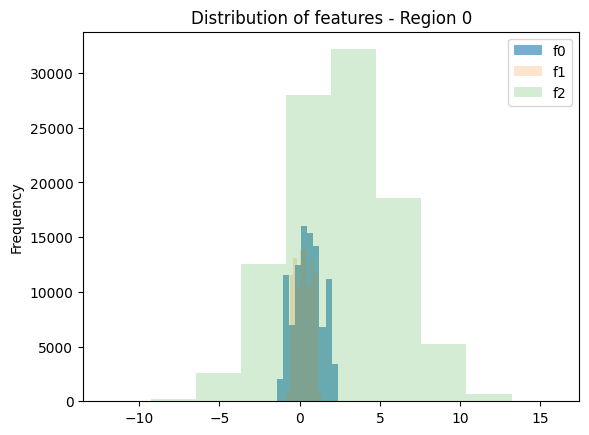

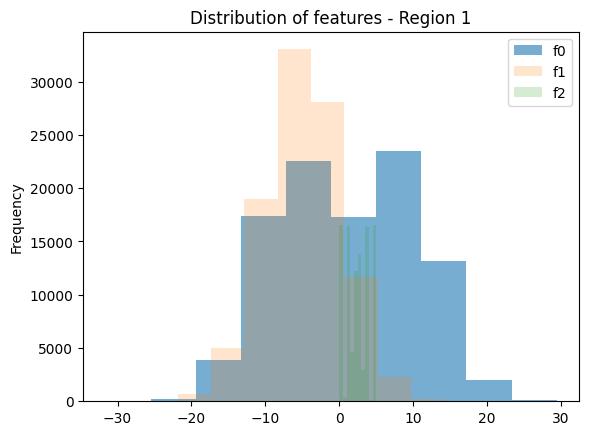

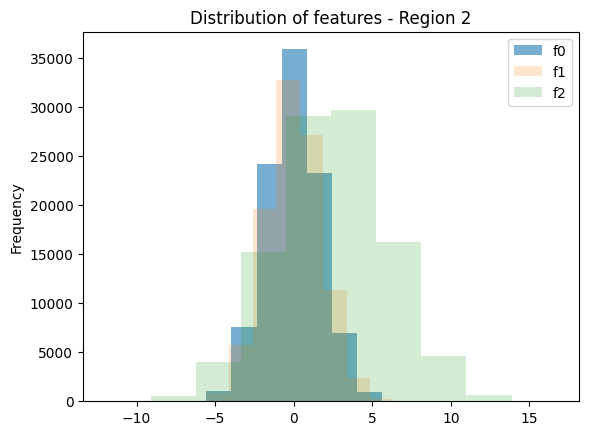

In [9]:
# Plot some graphs to see distribution of data

# Region 0
data_0['f0'].plot( kind = 'hist',
                   alpha=0.6)
data_0['f1'].plot( kind = 'hist',
                   alpha=0.2)
data_0['f2'].plot( kind = 'hist',
                   alpha=0.2)
plt.legend(['f0', 'f1', 'f2'])
plt.title('Distribution of features - Region 0')
plt.show()


# Region 1
data_1['f0'].plot( kind = 'hist',
                   alpha=0.6)
data_1['f1'].plot( kind = 'hist',
                   alpha=0.2)
data_1['f2'].plot( kind = 'hist',
                   alpha=0.2)
plt.legend(['f0', 'f1', 'f2'])
plt.title('Distribution of features - Region 1')
plt.show()


# Region 2
data_2['f0'].plot( kind = 'hist',
                   alpha=0.6)
data_2['f1'].plot( kind = 'hist',
                   alpha=0.2)
data_2['f2'].plot( kind = 'hist',
                   alpha=0.2)
plt.legend(['f0', 'f1', 'f2'])
plt.title('Distribution of features - Region 2')
plt.show()

Based on the above graphs, it can be seen that the features in Region 0 and Region 1 should be scaled, whereas the features data in Region 2 seem to be evenly distributed so no data scaling is required.

## Train Model

### Region 0

In [10]:
# Separate features and target
target_0 = data_0['product']
features_0 = data_0.drop(['id','product'], axis=1)

# Split data into training 70% and validation/test 25% set
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, 
    test_size=0.25, random_state=12345)

In [11]:
# Data Scaling
scaler = StandardScaler()
scaler.fit(features_train_0)
features_train_0 = scaler.transform(features_train_0)
features_valid_0 = scaler.transform(features_valid_0)

In [12]:
model = LinearRegression()

# Train the model using the training sets then make predictions
model.fit(features_train_0, target_train_0)
predicted_valid_0 = model.predict(features_valid_0)

avg_volume_0 = predicted_valid_0.mean()
print('Average volume of predicted reserves for Region 0:', avg_volume_0)

print('Average volume of targeted reserves for Region 0:', target_valid_0.mean())

mse = mean_squared_error(target_valid_0, predicted_valid_0)
rmse = mse ** 0.5
print('RMSE for Region 0:', rmse)

Average volume of predicted reserves for Region 0: 92.595815339811
Average volume of targeted reserves for Region 0: 92.34784935243168
RMSE for Region 0: 37.92658327086352


### Region 1

In [13]:
# Separate features and target
target_1 = data_1['product']
features_1 = data_1.drop(['id','product'], axis=1)

# Split data into training 70% and validation/test 25% set
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, 
    test_size=0.25, random_state=12345)

In [14]:
# Data Scaling
scaler = StandardScaler()
scaler.fit(features_train_1)
features_train_1 = scaler.transform(features_train_1)
features_valid_1 = scaler.transform(features_valid_1)

In [15]:
model = LinearRegression()

# Train the model using the training sets then make predictions
model.fit(features_train_1, target_train_1)
predicted_valid_1 = model.predict(features_valid_1)

avg_volume_1 = predicted_valid_1.mean()
print('Average volume of predicted reserves for Region 1:', avg_volume_1)

print('Average volume of targeted reserves for Region 1:', target_valid_1.mean())


mse = mean_squared_error(target_valid_1, predicted_valid_1)
rmse = mse ** 0.5
print('RMSE for Region 1:', rmse)

Average volume of predicted reserves for Region 1: 68.52866705781803
Average volume of targeted reserves for Region 1: 68.53697799242255
RMSE for Region 1: 0.8877441757012706


### Region 2

In [16]:
# Separate features and target
target_2 = data_2['product']
features_2 = data_2.drop(['id','product'], axis=1)

# Split data into training 70% and validation/test 25% set
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, 
    test_size=0.25, random_state=12345)

In [17]:
model = LinearRegression()

# Train the model using the training sets then make predictions
model.fit(features_train_2, target_train_2)
predicted_valid_2 = model.predict(features_valid_2)

avg_volume_2 = predicted_valid_2.mean()
print('Average volume of predicted reserves for Region 2:', avg_volume_2)

print('Average volume of targeted reserves for Region 2:', target_valid_2.mean())

mse = mean_squared_error(target_valid_2, predicted_valid_2)
rmse = mse ** 0.5
print('RMSE for Region 2:', rmse)

Average volume of predicted reserves for Region 2: 94.93593212204372
Average volume of targeted reserves for Region 2: 94.56578475991805
RMSE for Region 2: 40.18554498370539


Based on the predictions and average volume of oil reserves, Region 0 and Region 2 are better as the wells there will have an average volume of 92.59 and 94.965 respectively. The predicted averages are very close to the target value average. On the other hand the RMSE for Region 0 and 2 are high so this does not give as clear a picture, and is based on just the average of volume of oil reserves. Profit calculations will give a better idea as to which region will be more profitable.


## Prepare for Profit Calculation

In [18]:
no_of_wells = 200
total_budget = 100000000
budget_per_well = total_budget/no_of_wells

revenue_per_unit_product = 4500

min_volume_needed = budget_per_well/revenue_per_unit_product
print('Min volume needed to break even:', min_volume_needed)

Min volume needed to break even: 111.11111111111111


In [19]:
# Average volume of reserves in each region

print('Average volume of reserve in Region 0:', data_0['product'].mean())
print('Average volume of reserve in Region 0:', data_1['product'].mean())
print('Average volume of reserve in Region 0:', data_2['product'].mean())

Average volume of reserve in Region 0: 92.49948184460142
Average volume of reserve in Region 0: 68.82523184270339
Average volume of reserve in Region 0: 95.00042479767433


Based on the budget for each well and revenue per unit product, each oil well should have a resrve of 111.11 to make it profitable. This is higher than the average for volume reserves obtained earlier, and also higher than the actual average volume in each region currently, which shows we need to dive deeper into this instead of just looking at the average volume.

## Calculate Profit

In [20]:
# Function to calculate profit

def calculate_profit(predictions, targets, n_wells=200): 
    sorted_indices = np.argsort(predictions)[-n_wells:] # Get indices of the top 200 predictions
    selected_reserves = targets.iloc[sorted_indices]
    total_reserves = selected_reserves.sum()
    profit = (total_reserves * 4.5) - 100000  # Convert to thousand dollars
    return profit


In [21]:
# Calculate Profit for each region

#Region 0
profit_0 = calculate_profit(predicted_valid_0, target_valid_0)
print('Profit Region 0:', round(profit_0,2))

#Region 1
profit_1 = calculate_profit(predicted_valid_1, target_valid_1)
print('Profit Region 1:', round(profit_1,2))

#Region 2
profit_2 = calculate_profit(predicted_valid_2, target_valid_2)
print('Profit Region 2:', round(profit_2,2))

Profit Region 0: 29900.85
Profit Region 1: 24150.87
Profit Region 2: 24262.1


Based on the profits calculated above for the top 200 points, Region 0 is most suited for well development. It yielded the higest profit compared to Region 1 and 2.

## Risks and Profits of each region

After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

In [22]:
# Function to calculate profit based on bootstrapping (the n_samples is 500 to sample 500 rows) 

def bootstrap_profit(predictions, targets, n_wells=200, n_samples=1000, seed=42):
    rng = RandomState(seed)
    profits = []

    for _ in range(n_samples):
        sample_indices = rng.choice(predictions.size, size=500, replace=True)
        sample_predictions = predictions[sample_indices]
        sample_targets = targets.iloc[sample_indices]
        profit = calculate_profit(sample_predictions, sample_targets, n_wells)
        profits.append(profit)

    profits = np.array(profits)
    return profits

# Profits based on bootstrapping for each region
profits_0 = bootstrap_profit(predicted_valid_0, target_valid_0)
profits_1 = bootstrap_profit(predicted_valid_1, target_valid_1)
profits_2 = bootstrap_profit(predicted_valid_2, target_valid_2)

In [23]:
# Function to analyze profits determined through bootstrapping for its confidence interval and risk of loss 

def analyze_profits(profits):
    avg_profit = profits.mean() * 1000
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    risk_of_loss = (profits < 0).mean() * 100  # Percentage
    return avg_profit, confidence_interval, risk_of_loss

avg_profit_0, ci_0, risk_0 = analyze_profits(profits_0)
avg_profit_1, ci_1, risk_1 = analyze_profits(profits_1)
avg_profit_2, ci_2, risk_2 = analyze_profits(profits_2)

print(f"Region 0 - Avg Profit: {avg_profit_0}, CI: {ci_0}, Risk: {risk_0}%")
print(f"Region 1 - Avg Profit: {avg_profit_1}, CI: {ci_1}, Risk: {risk_1}%")
print(f"Region 2 - Avg Profit: {avg_profit_2}, CI: {ci_2}, Risk: {risk_2}%")

Region 0 - Avg Profit: 4146500.2662595245, CI: [-557.25085998 9187.37613426], Risk: 5.5%
Region 1 - Avg Profit: 4445759.541525198, CI: [ 431.67589326 8280.33073933], Risk: 1.5%
Region 2 - Avg Profit: 3199438.9457635973, CI: [-1926.39377831  8575.35544408], Risk: 13.0%


Based on the above calculations from the bootstrapping bethod, Region 1 has the highest average profit at \\$4,445,759 with the lowest loss of risk at 1.5%. On the other hand, Region 2 has the lowest average profit at \\$3,199,438 with the highest risk of loss at 13%.

## Conclusion

We analyzed data given for the three regions based on volume of well reserves and profits each region would generate. Based on that, Region 1 is picked as the most suitable location as it yielded in the highest average profit of $4,445,759 with lowest risk of loss at 1.5%, and also high values within a 95% confidence interval.